<h2>Vizualizador de Datos Médicos</h2>

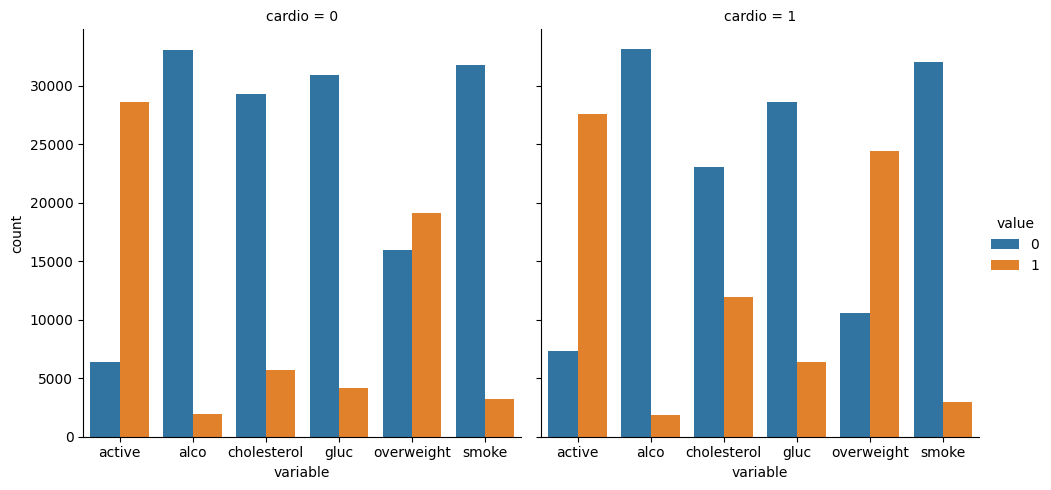

AttributeError: 'Axes' object has no attribute 'savefig'

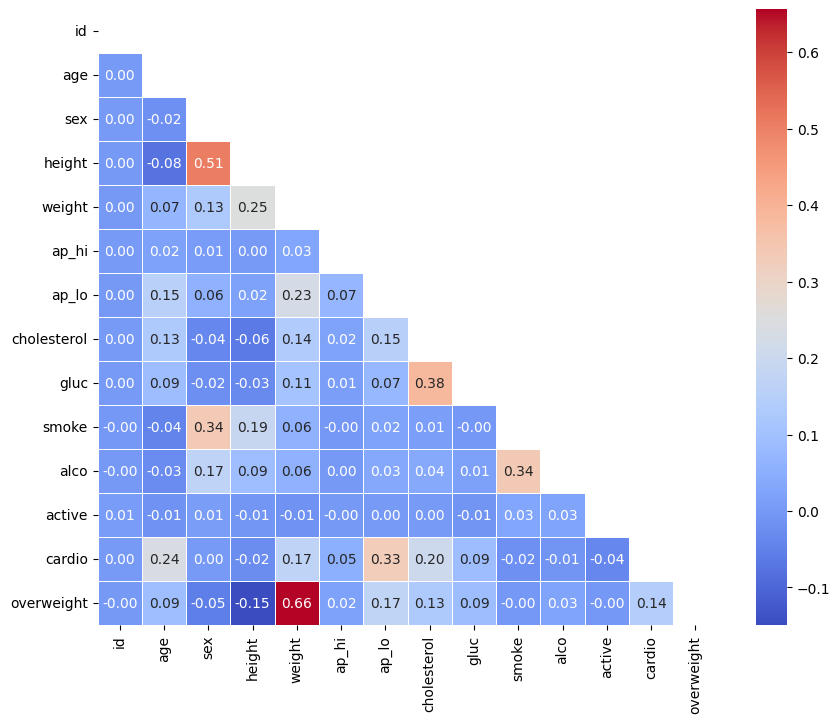

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('ExcelFiles/medical_examination.csv')

# 2
df['overweight'] = (round(df['weight'] / (df['height']/100)**2, 2)).apply(lambda x: 1 if x > 25 else 0 )

# 3
df[['cholesterol','gluc']] = df[['cholesterol','gluc']].apply(lambda x: x.map(lambda y: 0 if y == 1 else 1))

# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])


    # 6
    df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='count')
    

    # 7
    cat = sns.catplot(x='variable', y='count',hue='value', col='cardio', kind='bar', data=df_cat)


    # 8
    fig = plt.show()


    # 9
    cat.fig.savefig('catplot.png')
    return fig
draw_cat_plot()

# 10
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) & 
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # 14
    fig, ax = plt.subplots(figsize=(10,8))

    # 15
    fig = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths='0.5', ax=ax)


    # 16
    fig.savefig('heatmap.png')
    return fig
    
draw_heat_map()

<Axes: >

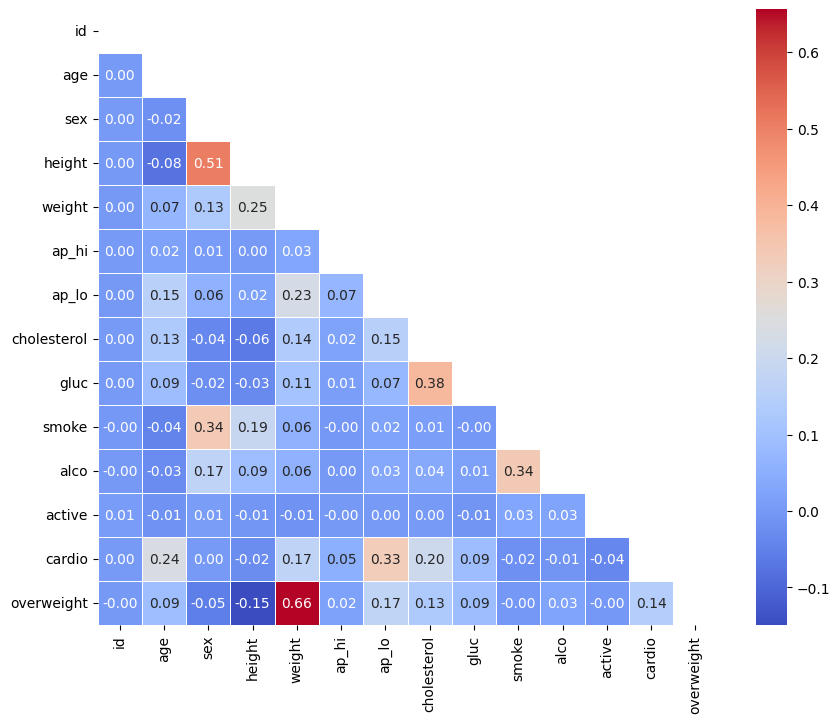

In [43]:
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) & 
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # 14
    fig, ax = plt.subplots(figsize=(10,8))

    # 15
    fig = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths='0.5', ax=ax)


    # 16
    #fig.savefig('heatmap.png')
    return fig
draw_heat_map()

In [42]:
df_heat = df[
(df['ap_lo'] <= df['ap_hi']) & 
(df['height'] >= df['height'].quantile(0.025)) & 
(df['height'] <= df['height'].quantile(0.975)) &
(df['weight'] >= df['weight'].quantile(0.025)) &
(df['weight'] <= df['weight'].quantile(0.975))
]

corr = df_heat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

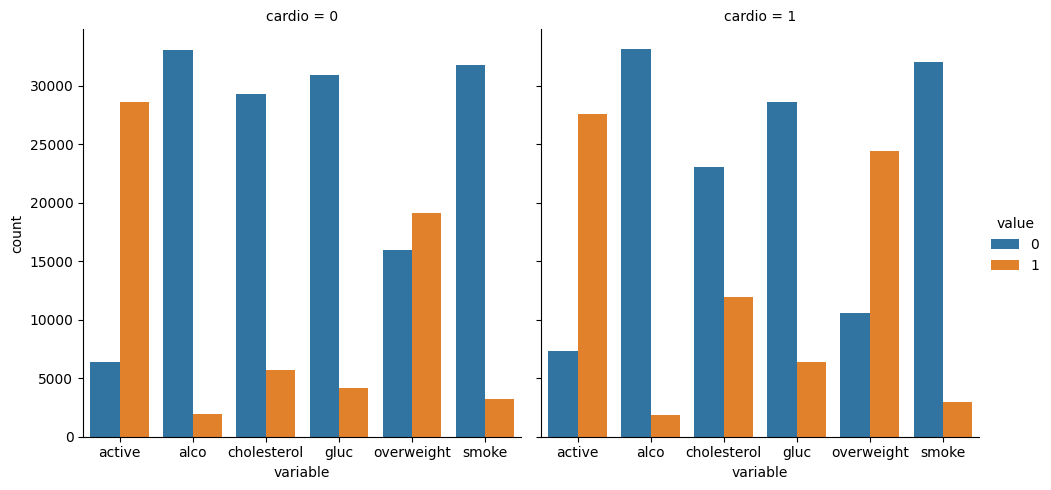

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('ExcelFiles/medical_examination.csv')

df['overweight'] = (round(df['weight'] / (df['height']/100)**2, 2)).apply(lambda x: 1 if x > 25 else 0 )

df[['cholesterol','gluc']] = df[['cholesterol','gluc']].apply(lambda x: x.map(lambda y: 0 if y == 1 else 1))

def draw_cat_plot():

    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

    df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='count')
    
    sns.catplot(x='variable', y='count',hue='value', col='cardio', kind='bar', data=df_cat)

    fig = plt.show()

    return fig

draw_cat_plot()

In [16]:
df = pd.read_csv('ExcelFiles/medical_examination.csv')
#df['imc'] = (round(df['weight'] / (df['height']/100)**2, 2))
df['overweight'] = (round(df['weight'] / (df['height']/100)**2, 2)).apply(lambda x: 1 if x > 25 else 0 )
#map() aplica la transformación elemento por elemento dentro de cada columna.
#df[['cholesterol','gluc']] = df[['cholesterol','gluc']].apply(lambda x: x.map(lambda y: 0 if y == 1 else 1))
df_cat = pd.melt(df, id_vars=['cholesterol','gluc'], value_vars=['smoke','alco','active','overweight'])
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [28]:
#Agrupe y reformatee los datos df_catpara dividirlos por cardio. Muestre los recuentos de cada característica. 
# Deberá cambiar el nombre de una de las columnas para que catplotfuncione correctamente.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='Count')
df_cat

,cardio,variable,value,Count
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,1,29330
5,0,cholesterol,2,3799
6,0,cholesterol,3,1892
7,0,gluc,1,30894
8,0,gluc,2,2112
9,0,gluc,3,2015
